# What Keeps Us Awake at Night? by Egem Yorulmaz

Over history, what has kept us up at night? This study will explore fear and its affiliated concepts in the history of philosophy. Some questions asked were: What words are most affiliated with "fear" in philosophical writing throughout history? How has the usage of these words changed over time? Do philosophers agree on affiliating certain words with "fear"? What kind of an effect can sociopolitical events have on a philosophical understanding of fear?

# Data Organization

We will begin by pip downloading and importing all of the necessary packages, as seen below.

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tag import pos_tag_sents
from nltk.tokenize import word_tokenize

After this, I cleaned the data and removed any unnecessary information. Since I was not focusing on schools of thought, I dropped this column and some other columns pertaining to the sentences themselves. Following this, I dropped all of the sentences that did not include the word "fear" from the database, as this was the focus of the study.

In [2]:
database = open('philosophy_data.csv')
data = pd.read_csv(database)

data = data.drop("sentence_lowered", 1)
data = data.drop("lemmatized_str", 1)
data = data.drop("corpus_edition_date", 1)
data = data.drop("sentence_str", 1)
data = data.drop("school", 1)
data = data.drop("sentence_length", 1)

data = data.loc[data["tokenized_txt"].str.contains("fear", case=False)]

tagged_sen = []
nouns = []
author = []
date = []
complete = []
index = len(data)
min_date = 0
max_date = 0
for ind in data.index:
    tokenized = word_tokenize(data["sentence_spacy"][ind])
    author = author + [data["author"][ind]]
    date = date + [data["original_publication_date"][ind]]
    if data["original_publication_date"][ind] < min_date:
        min_date = data["original_publication_date"][ind]
    elif data["original_publication_date"][ind] > max_date: 
        max_date = data["original_publication_date"][ind]
    tagged = nltk.pos_tag(tokenized)
    for j in tagged:
        if "NN" in j or "NNS" in j or "NNP" in j or "NNPS" in j:
            if j[0] != "fear" and j[0] != "fears" and j[0] != "thing" and j[0] != "things":
                nouns = nouns + [j]
                complete = complete + [[j, data["author"][ind], data["original_publication_date"][ind]]]
        else:
            tagged_sen = tagged_sen + [tagged]

As you can see below, we are left with a clean dataframe of sentences that include the word "fear" across all publication dates and authors.

In [3]:
data

,title,author,sentence_spacy,original_publication_date,tokenized_txt
18,Plato - Complete Works,Plato,"I could wish this were true, Socrates, but I f...",-350,"['could', 'wish', 'this', 'were', 'true', 'soc..."
57,Plato - Complete Works,Plato,"Whereas, by Zeus, Euthyphro, you think that yo...",-350,"['whereas', 'by', 'zeus', 'euthyphro', 'you', ..."
208,Plato - Complete Works,Plato,I am saying the opposite of what the poet said...,-350,"['am', 'saying', 'the', 'opposite', 'of', 'wha..."
211,Plato - Complete Works,Plato,I do not think that 'where there is fear there...,-350,"['do', 'not', 'think', 'that', 'where', 'there..."
212,Plato - Complete Works,Plato,for I think that many people who fear disease ...,-350,"['for', 'think', 'that', 'many', 'people', 'wh..."
...,...,...,...,...,...
359361,"Women, Race, And Class",Davis,"According to Wells, Terrell's fears about her ...",1981,"['according', 'to', 'wells', 'terrell', 'fears..."
359604,"Women, Race, And Class",Davis,"Even as her husband was being executed, Lucy P...",1981,"['even', 'as', 'her', 'husband', 'was', 'being..."
359628,"Women, Race, And Class",Davis,"She was one of America's truly great women, fe...",1981,"['she', 'was', 'one', 'of', 'america', 'truly'..."
360187,"Women, Race, And Class",Davis,"Confused and fearful, they fell into line.",1981,"['confused', 'and', 'fearful', 'they', 'fell',..."


# Data Analysis

To gain an initial understanding of words affiliated with "fear", we firstly look at a representation of all nouns in "fear"-inclusive sentences, ordered by number of occurrences. To do this, we can assess the word cloud below. 

From now on, any word that is in the same sentence as "fear" will be referred to as a "fear"-affiliated word. 

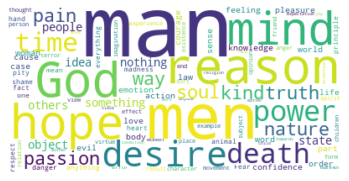

In [4]:
# WordCloud code snippet from https://www.datacamp.com/community/tutorials/wordcloud-python

noun = []
for j in nouns:
    noun = noun + [j[0]]
    
noun = " ".join(noun)
    
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(noun)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As portrayed above, "man/men", "nature", "God", "desire", "truth", "soul", "time", "passion" are only some of the popular words used in the same sentence as "fear" over history. Here, we can see a distinct divide between abstract and concrete nouns; while "death" and "passion" indicate fear affiliated with abstract concepts, "man/men" and "nature" provide more concrete examples. To see a full breakdown of each repeated word, we run the code snippet below to find the 50 most repeated words:

In [5]:
counts = Counter(x[0] for x in nouns)
print(counts.most_common(50))


[('man', 220), ('men', 96), ('reason', 91), ('hope', 79), ('death', 76), ('power', 71), ('pain', 70), ('God', 70), ('something', 67), ('way', 66), ('nature', 66), ('nothing', 64), ('mind', 64), ('desire', 63), ('others', 61), ('people', 59), ('truth', 58), ('soul', 58), ('life', 56), ('woman', 56), ('time', 55), ('kind', 54), ('pleasure', 54), ('body', 51), ('state', 51), ('world', 50), ('passions', 45), ('love', 45), ('knowledge', 43), ('courage', 41), ('idea', 40), ('anything', 39), ('object', 39), ('confidence', 38), ('order', 38), ('part', 37), ('shame', 36), ('fact', 36), ('respect', 36), ('evil', 34), ('pity', 33), ('Fear', 33), ('case', 31), ('anger', 31), ('madness', 31), ('everything', 30), ('joy', 30), ('cause', 29), ('women', 29), ('child', 28)]


To see how the usage of these words have changed over history, we will divide the time covered in the database up into chunks and separate the words by date published. We will then take a look at how the usage of the words (% included in number of total "fear"-affiliated words) have changed over this chunk of time.

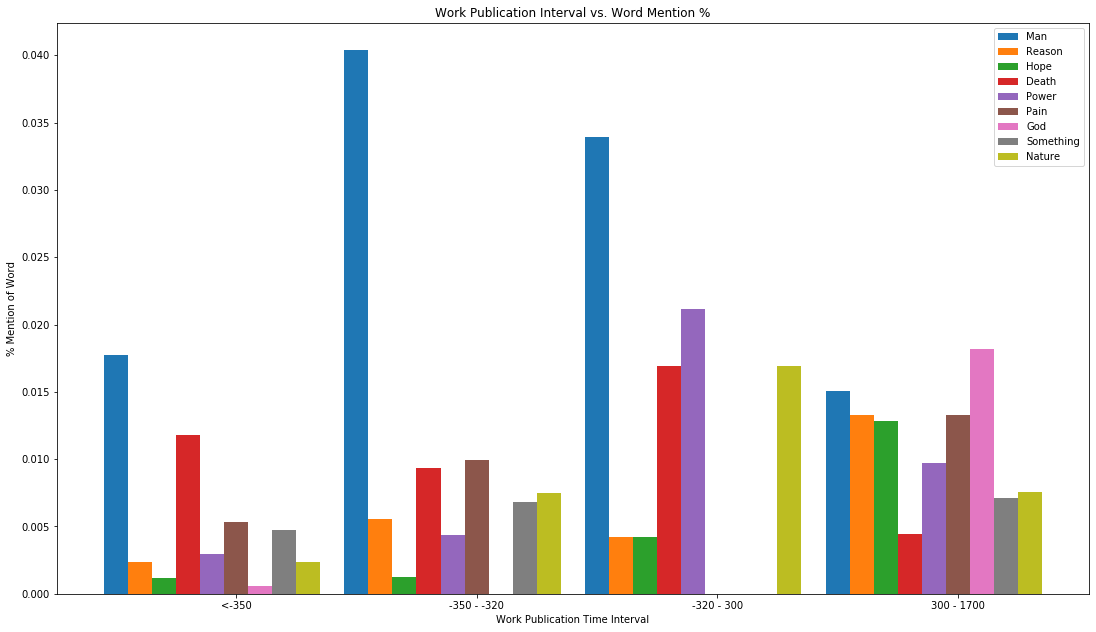

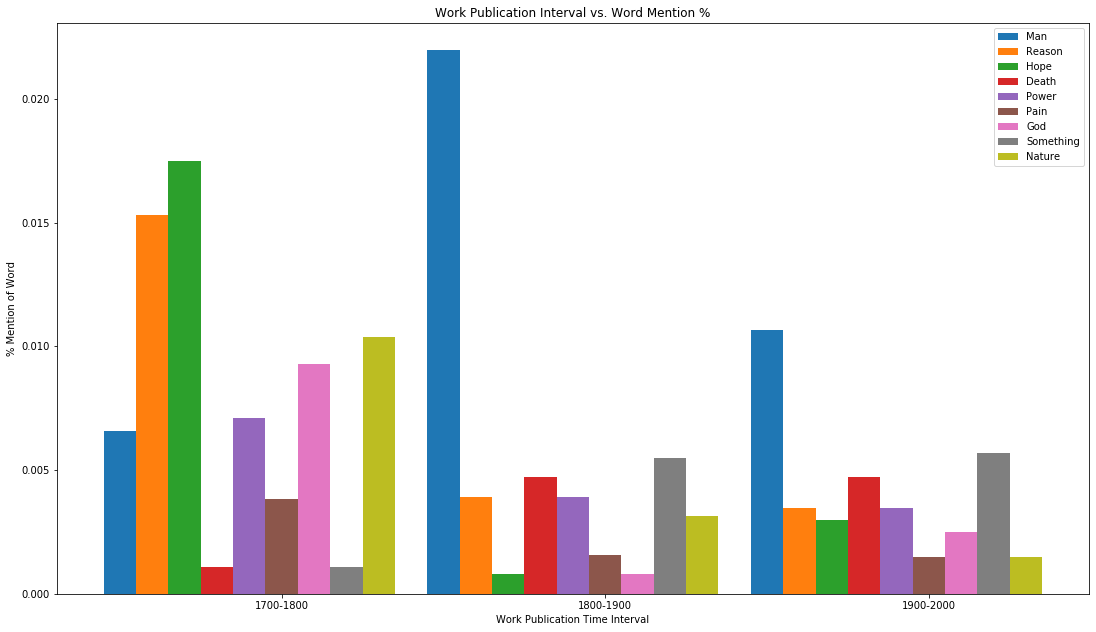

In [6]:
interval1 = [] 
interval2 = [] 
interval3 = [] 
interval4 = [] 
interval5 = [] 
interval6 = [] 
interval7 = [] 
interval8 = [] 
interval9 = [] 
interval10 = [] 

for k in complete:
    if k[2] == -350:
        interval1 = interval1 + [k]

    elif k[2] == -320:
        interval2 = interval2 + [k]

    elif k[2] < 300:
        interval3 = interval3 + [k]


    elif k[2] < 1700:
        interval4 = interval4 + [k]


    elif k[2] < 1800:
        interval5 = interval5 + [k]

        
    elif k[2] < 1900:
        interval6 = interval6 + [k]


    elif k[2] < 2000:
        interval7 = interval7 + [k]
        
counts1 = Counter(x[0][0] for x in interval1)
counts2 = Counter(x[0][0] for x in interval2)
counts3 = Counter(x[0][0] for x in interval3)
counts4 = Counter(x[0][0] for x in interval4)
counts5 = Counter(x[0][0] for x in interval5)
counts6 = Counter(x[0][0] for x in interval6)
counts7 = Counter(x[0][0] for x in interval7)

counts = [counts1, counts2, counts3, counts4, counts5,  counts6, counts7]
intervals = [interval1, interval2, interval3, interval4, interval5, interval6, interval7]

topwords = ["man", "reason", "hope", "death", "power", "pain", "God", "something", "nature"]
perc = [[], [], [], [], [], [], [], [], []]

for word in topwords:
    for ind in range(0,7):
        perc[topwords.index(word)] = perc[topwords.index(word)] + [counts[ind][word] / len(intervals[ind])]


fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)

time = ["-350", "-320", "300", "1700", "1800", "1900", "2000"]    

x = np.arange(len(time[0:4]))  # the label locations
width = 0.1  # the width of the bars

df = pd.DataFrame()

for word in topwords:
    df.insert(topwords.index(word), word, perc[topwords.index(word)], True)

df.reindex(["-350", "-320", "300", "1700", "1800", "1900", "2000"])

ax.bar(x - 4*width, df.iloc[0:4,0], width=0.1, label='Man')
ax.bar(x - 3*width, df.iloc[0:4,1], width=0.1, label='Reason')
ax.bar(x - 2*width, df.iloc[0:4,2], width=0.1, label='Hope')
ax.bar(x - width, df.iloc[0:4,3], width=0.1, label='Death')
ax.bar(x, df.iloc[0:4,4], width=0.1, label='Power')
ax.bar(x + width, df.iloc[0:4,5], width=0.1, label='Pain')
ax.bar(x + 2*width, df.iloc[0:4,6], width=0.1, label='God')
ax.bar(x + 3*width, df.iloc[0:4,7], width=0.1, label='Something')
ax.bar(x + 4*width, df.iloc[0:4,8], width=0.1, label='Nature')

ax.set_xticks(x+width)
ax.set_xticklabels( ("<-350", "-350 - -320", "-320 - 300", "300 - 1700") )
#ax.legend( (rects1[0], rects2[0], rects3[0]), ('y', 'z', 'k') )

ax.legend()
ax.set_ylabel('% Mention of Word')
ax.set_xlabel('Work Publication Time Interval')

plt.title("Work Publication Interval vs. Word Mention %")
plt.show()

fig2, ax2 = plt.subplots()

fig2.set_size_inches(18.5, 10.5)

x = np.arange(len(time[4:]))  # the label locations
width = 0.1  # the width of the bars

ax2.bar(x - 4*width, df.iloc[4:,0], width=0.1, label='Man')
ax2.bar(x - 3*width, df.iloc[4:,1], width=0.1, label='Reason')
ax2.bar(x - 2*width, df.iloc[4:,2], width=0.1, label='Hope')
ax2.bar(x - width, df.iloc[4:,3], width=0.1, label='Death')
ax2.bar(x, df.iloc[4:,4], width=0.1, label='Power')
ax2.bar(x + width, df.iloc[4:,5], width=0.1, label='Pain')
ax2.bar(x + 2*width, df.iloc[4:,6], width=0.1, label='God')
ax2.bar(x + 3*width, df.iloc[4:,7], width=0.1, label='Something')
ax2.bar(x + 4*width, df.iloc[4:,8], width=0.1, label='Nature')

ax2.set_xticks(x+width)
ax2.set_xticklabels( ("1700-1800", "1800-1900", "1900-2000") )

ax2.legend()
ax2.set_ylabel('% Mention of Word')
ax2.set_xlabel('Work Publication Time Interval')

plt.title("Work Publication Interval vs. Word Mention %")


plt.show()

It is now easier to see how historical events and tendencies may have affected the works; mentions of "God" are relatively higher in works published between 1700-1800, this presence potentially correlating to the prevalence of Christianity with its subsequent decrease in 1800-onwards corresponding to the rise of secularism. It is important to note that a decrease in the usage of "God" from the nineteenth century onwards happens concurrently with an increase in the usage of "Death", which falls in line with secular Reformation and Renaissance practices of separating religion from scientific cycles of life.

In this vein, we could also interpret the rise of "hope" in the 1700-1800 time frame as a response to the fluctuating social order of the time, and of the clashing cultural tendencies of religious and secular groups. 

Abstract concepts such as "pain" and "power" also see a decrease, especially in the >1800 time frame, leading way to the question of what took their place in modern philosophical texts.  

Another way we can try to understand the sociopolitical effects on fear is by analyzing fear-affiliated words for each author. Below, we compute Wordclouds for each individual philosopher and analyze our findings.


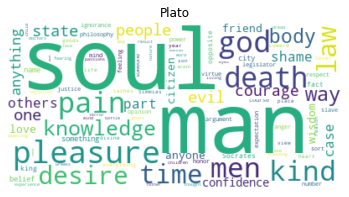

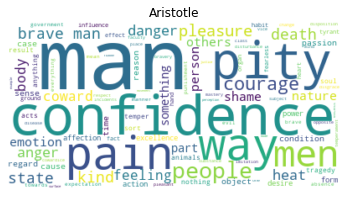

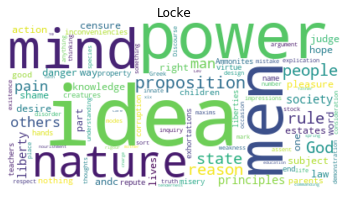

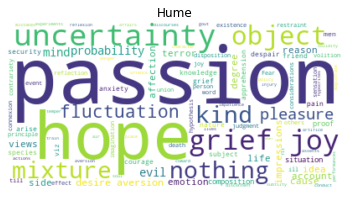

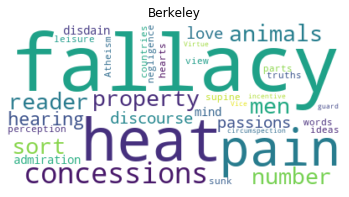

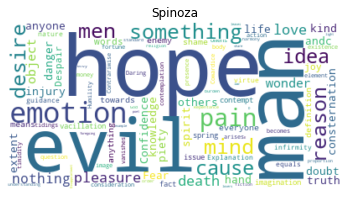

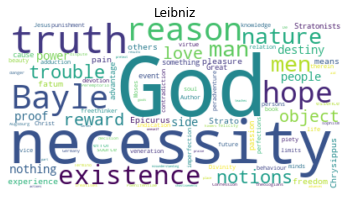

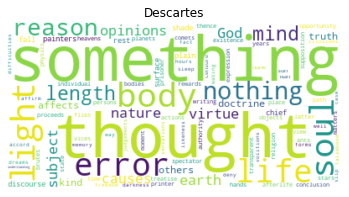

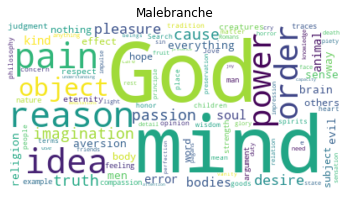

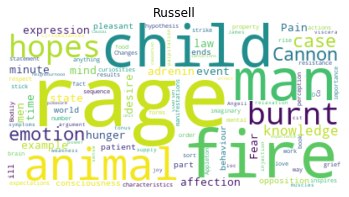

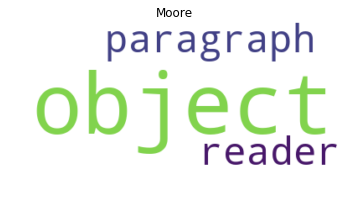

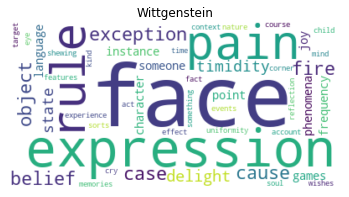

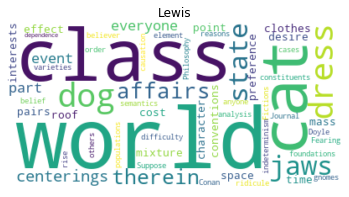

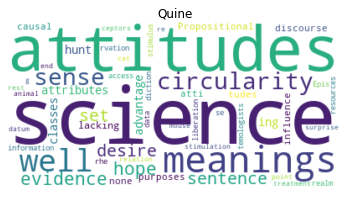

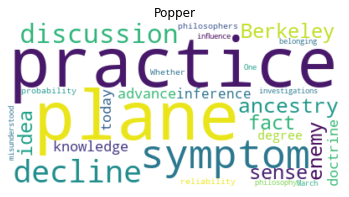

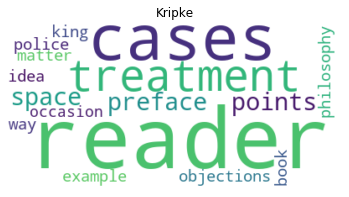

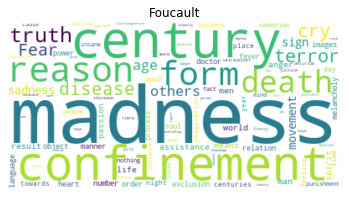

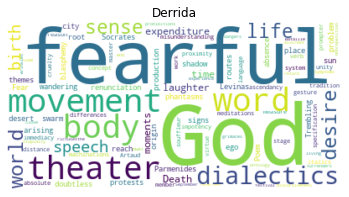

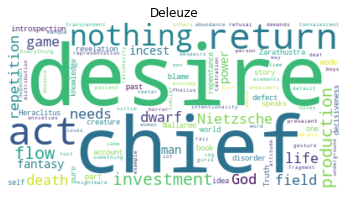

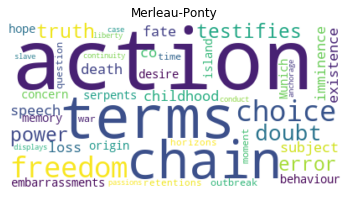

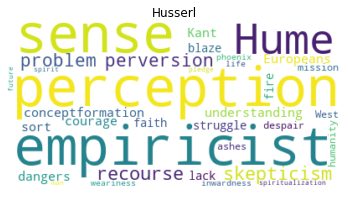

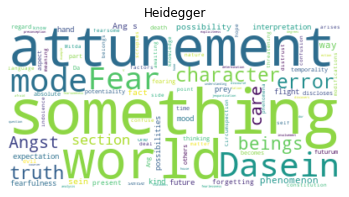

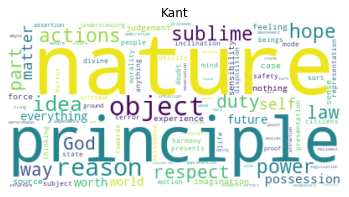

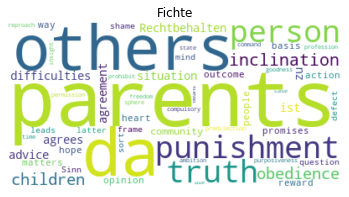

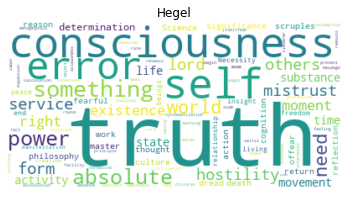

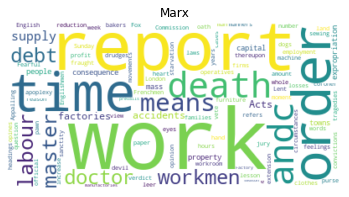

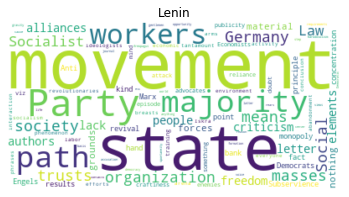

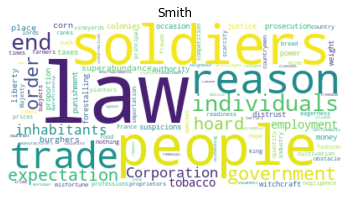

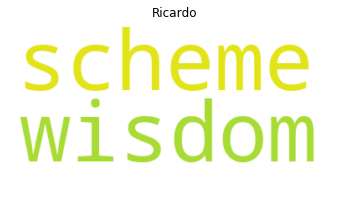

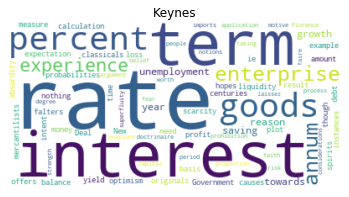

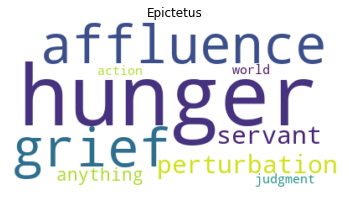

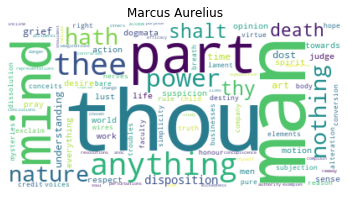

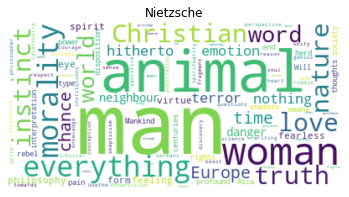

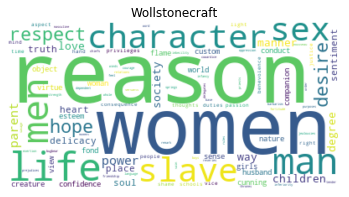

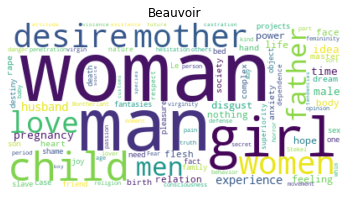

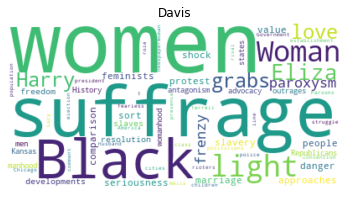

In [7]:
authors = []
author_array= [ [] for _ in range(36) ]   #https://stackoverflow.com/questions/33990673/how-to-create-a-list-of-empty-lists/33990750

for j in complete:
    if j[1] not in authors:
        authors = authors + [j[1]]
    author_array[authors.index(j[1])].append(j)
    
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(noun)
    
for j in author_array:
    author_noun = []
    for k in j:
        author_noun = author_noun + [k[0][0]]
    author_noun = " ".join(author_noun)
    
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(author_noun)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(j[0][1])
    plt.show()
    


The correlation between sociopolitical factors and their changing nature in affecting fear is even more apparent above: while Aristotle, Plato and other older philosophers tend to affiliate fear with abstract emotions such as passion, pleasure and pain, more modern philosophers have affiliated fear with organizational units or concrete concepts. Some examples of this are Lenin (state, workers, party), Beauvoir (woman, child, man), Davis (women, suffrage, Black).

From these we can see a shift towards fear affiliated with more pragmatic, urgent societal issues rather than existential topics for modern philosophers. 

A final important aspect of this study is matching up the philosophers to the major cultural movements they were a part of. For example, Leibniz's high usage of "God" in affiliation with "fear" collides with his lifetime during the Reformation period and his standing as a Protestant Christian, and this area should be studied further. A preliminary job of mapping these philosophers to a timeline has been completed below.  

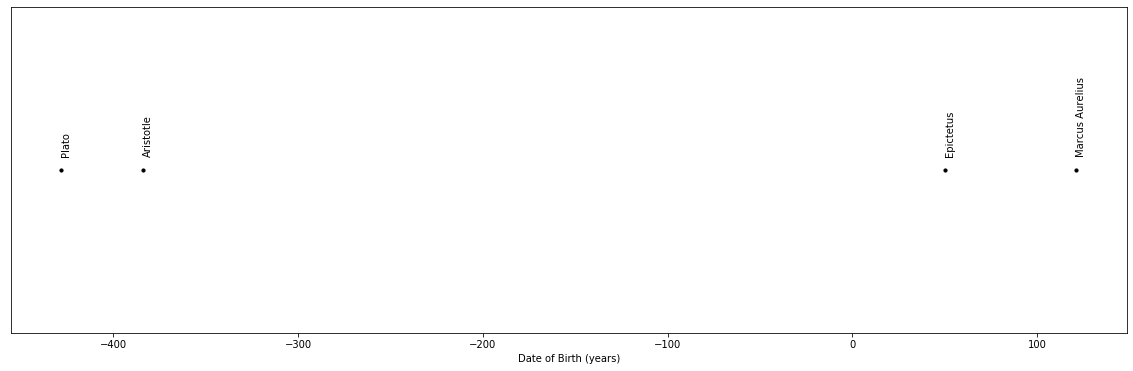

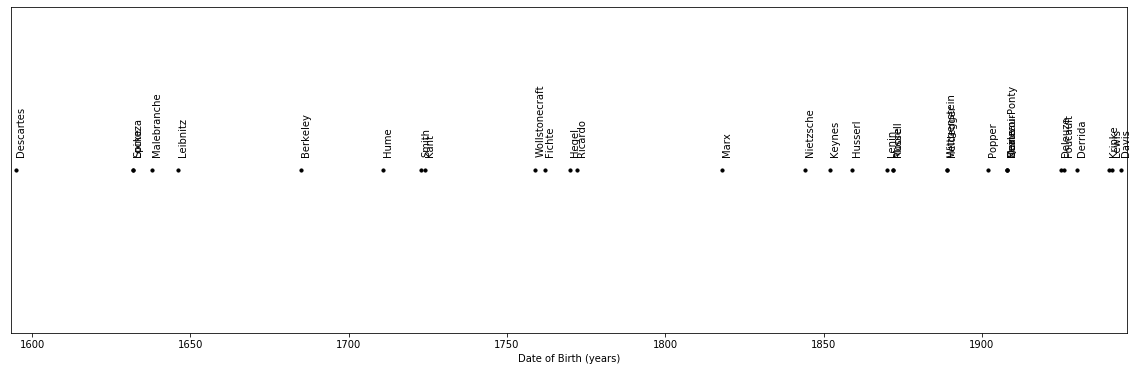

In [8]:
timeline = pd.DataFrame([['Plato', -428], 
                    ['Aristotle', -384],           
                         ['Epictetus', 50],
                         ['Marcus Aurelius', 121]],
                    columns=['Name', 'Birth'])

plt.figure(figsize=(20,6))

plt.scatter(timeline["Birth"], np.full_like(timeline["Birth"], 0), marker='o', s=10, color='black')

#for i, txt in enumerate(timeline["Name"]):
#    plt.annotate(txt, timeline[i])
    
for k in range(len(timeline["Name"])):
    plt.annotate(timeline["Name"][k], (timeline["Birth"][k], 0.0005), rotation=90) 
    
    
plt.xlabel('Date of Birth (years)')
plt.yticks([])

plt.savefig('timeline1')

timeline = pd.DataFrame([
                         ['Hume', 1711],
                         ['Berkeley', 1685],
                         ['Spinoza', 1632],
                         ['Leibnitz', 1646],
                         ['Descartes', 1595],
                         ['Malebranche', 1638],
                         ['Russell', 1872],
                         ['Moore', 1872],
                         ['Wittgenstein', 1889],
                         ['Lewis', 1941],
                         ['Quine', 1908],
                         ['Popper', 1902],
                         ['Kripke', 1940],
                         ['Foucault', 1926],
                         ['Derrida', 1930],
                         ['Deleuze', 1925],
                         ['Merleau-Ponty', 1908],
                         ['Husserl', 1859],
                         ['Heidegger', 1889],
                         ['Kant', 1724],
                         ['Fichte', 1762],
                         ['Hegel', 1770],
                         ['Marx', 1818],
                         ['Lenin', 1870],
                         ['Smith', 1723],
                         ['Ricardo', 1772],
                         ['Keynes', 1852],
                         ['Nietzsche', 1844],
                         ['Wollstonecraft', 1759],
                         ['Beauvoir', 1908],
                         ['Davis', 1944],
                    ['Locke', 1632]], 
                    columns=['Name', 'Birth'])

plt.figure(figsize=(20,6))

plt.scatter(timeline["Birth"], np.full_like(timeline["Birth"], 0), marker='o', s=10, color='black')

#for i, txt in enumerate(timeline["Name"]):
#    plt.annotate(txt, timeline[i])
    
for k in range(len(timeline["Name"])):
    plt.annotate(timeline["Name"][k], (timeline["Birth"][k], 0.0005), rotation=90) 
    
    
plt.xlabel('Date of Birth (years)')
plt.yticks([])
plt.margins(x=0.005)

plt.savefig('timeline2')


In conclusion, while ancient philosophers (published <300) such as Plato, Aristotle and Epictetus focus on fear affiliated with primal urges and abstract concepts, modern philosophers direct their attention to fear regarding topical issues that affect common people. 

This shift from existentialist to pragmatic fear is an extremely interesting area that I would like to explore further in other projects. 

# Data Limitiations

Below are two major limitations of the data, and how I would fix them if I revised this project.

(1) Time jumps: The dataset includes a significant time jump between BCE-300 and AD50 in its reported works, which made breaking the dataset up into even chunks by time difficult. Additionally, the works varied significantly in size and length, adding more complexity to the task. In this study I disregarded this 'empty' middle chunk entirely but will be looking into better ways of organizing time-based data.

(2) Lack of algorithms: I struggled with finding meaningful libraries or packages that would divide the sentences up into Subject/Object/Verb/etc. formation, as I was initially only interested in Objects of "fear" Verbs. However, I talked to Professor Ying Liu and he told me that using nltk made the most sense, as he also didn't know of a package I could use. Due to this I simply used all nouns in sentences including "fear" as "fear"-affiliated words, but will continue searching for this package in the future.

# Thank you so much for reading! I hope you have a great day.